In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [3]:
# Load Dataset
df = pd.read_excel("C:\\Users\\Jer\\Downloads\\Customer churn Data.xlsx")

print(f"✅ Dataset loaded successfully")
print(f"Shape: {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

✅ Dataset loaded successfully
Shape: 64374 rows and 17 columns


,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn,Age Group,Tenure Group,Usage Frequency Group,Payment Delay Group,Risk Segment
0,1,22,Female,25,14,4,27,Basic,Monthly,$598.00,9,1,18-25,25-36 Months,Medium (11-20),(21-30),Normal
1,239,46,Female,52,26,5,27,Basic,Monthly,$403.00,14,1,46-55,37-60 Months,High (21-30),(21-30),Normal
2,923,29,Female,19,27,9,27,Basic,Monthly,$435.00,22,1,26-35,13-24 Months,High (21-30),(21-30),Normal
3,1061,19,Female,11,3,7,27,Basic,Monthly,$716.00,24,1,18-25,7-12 Months,Very Low (1-5),(21-30),High Risk
4,2007,58,Female,17,30,6,27,Basic,Monthly,$595.00,18,1,55-65,13-24 Months,High (21-30),(21-30),Normal


In [4]:
# Check basic info - data types and null values
print("=== Dataset Info ===")
print(df.info())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             64374 non-null  int64 
 1   Age                    64374 non-null  int64 
 2   Gender                 64374 non-null  object
 3   Tenure                 64374 non-null  int64 
 4   Usage_Frequency        64374 non-null  int64 
 5   Support_Calls          64374 non-null  int64 
 6   Payment_Delay          64374 non-null  int64 
 7   Subscription_Type      64374 non-null  object
 8   Contract_Length        64374 non-null  object
 9   Total_Spend            64374 non-null  object
 10  Last_Interaction       64374 non-null  int64 
 11  Churn                  64374 non-null  int64 
 12  Age Group              64374 non-null  object
 13  Tenure Group           64374 non-null  object
 14  Usage Frequency Group  64374 non-null  object
 15

In [5]:
# Drop unnecessary columns
df = df.drop(columns=['CustomerID', 'Age Group', 'Tenure Group', 
                       'Usage Frequency Group', 'Payment Delay Group', 
                       'Risk Segment'])

# Convert Total_Spend to numeric
df['Total_Spend'] = pd.to_numeric(df['Total_Spend'], errors='coerce')

# Confirm changes
print("✅ Data cleaned successfully")
print(f"Shape after cleaning: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

✅ Data cleaned successfully
Shape after cleaning: (64374, 11)

Data types:
Age                    int64
Gender                object
Tenure                 int64
Usage_Frequency        int64
Support_Calls          int64
Payment_Delay          int64
Subscription_Type     object
Contract_Length       object
Total_Spend          float64
Last_Interaction       int64
Churn                  int64
dtype: object

Missing values:
Age                      0
Gender                   0
Tenure                   0
Usage_Frequency          0
Support_Calls            0
Payment_Delay            0
Subscription_Type        0
Contract_Length          0
Total_Spend          64374
Last_Interaction         0
Churn                    0
dtype: int64


In [6]:
# Check what Total_Spend actually looks like
print(df['Total_Spend'].head(20))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: Total_Spend, dtype: float64


In [7]:
# Reload raw data to inspect Total_Spend before any changes
df_raw = pd.read_excel("C:\\Users\\Jer\\Downloads\\Customer churn Data.xlsx")

print("Raw Total_Spend sample:")
print(df_raw['Total_Spend'].head(20))
print(f"\nData type: {df_raw['Total_Spend'].dtype}")

Raw Total_Spend sample:
0     $598.00
1     $403.00
2     $435.00
3     $716.00
4     $595.00
5     $973.00
6     $752.00
7     $910.00
8     $789.00
9     $399.00
10    $305.00
11    $418.00
12    $117.00
13    $539.00
14    $810.00
15    $678.00
16    $253.00
17    $538.00
18    $577.00
19    $166.00
Name: Total_Spend, dtype: object

Data type: object


In [8]:
# Drop unnecessary columns
df = df_raw.drop(columns=['CustomerID', 'Age Group', 'Tenure Group', 
                       'Usage Frequency Group', 'Payment Delay Group', 
                       'Risk Segment'])

# Remove $ sign and convert Total_Spend to numeric
df['Total_Spend'] = df['Total_Spend'].str.replace('$', '', regex=False)
df['Total_Spend'] = pd.to_numeric(df['Total_Spend'], errors='coerce')

# Confirm changes
print("✅ Data cleaned successfully")
print(f"Shape after cleaning: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nTotal_Spend sample:\n{df['Total_Spend'].head()}")

✅ Data cleaned successfully
Shape after cleaning: (64374, 11)

Data types:
Age                    int64
Gender                object
Tenure                 int64
Usage_Frequency        int64
Support_Calls          int64
Payment_Delay          int64
Subscription_Type     object
Contract_Length       object
Total_Spend          float64
Last_Interaction       int64
Churn                  int64
dtype: object

Missing values:
Age                   0
Gender                0
Tenure                0
Usage_Frequency       0
Support_Calls         0
Payment_Delay         0
Subscription_Type     0
Contract_Length       0
Total_Spend          35
Last_Interaction      0
Churn                 0
dtype: int64

Total_Spend sample:
0    598.0
1    403.0
2    435.0
3    716.0
4    595.0
Name: Total_Spend, dtype: float64


In [9]:
# Reload fresh
df = df_raw.drop(columns=['CustomerID', 'Age Group', 'Tenure Group', 
                       'Usage Frequency Group', 'Payment Delay Group', 
                       'Risk Segment'])

# Check the 35 problematic rows BEFORE conversion
df['Total_Spend_Clean'] = df['Total_Spend'].str.replace('$', '', regex=False).str.strip()

# Show the rows that couldn't convert
mask = pd.to_numeric(df['Total_Spend_Clean'], errors='coerce').isna()
print(f"Problematic rows: {mask.sum()}")
print(df[mask]['Total_Spend'].unique())

Problematic rows: 35
['$1,000.00']


In [10]:
# Drop unnecessary columns
df = df_raw.drop(columns=['CustomerID', 'Age Group', 'Tenure Group', 
                       'Usage Frequency Group', 'Payment Delay Group', 
                       'Risk Segment'])

# Remove $ sign AND comma, then convert Total_Spend to numeric
df['Total_Spend'] = df['Total_Spend'].str.replace('$', '', regex=False)\
                                      .str.replace(',', '', regex=False)\
                                      .str.strip()
df['Total_Spend'] = pd.to_numeric(df['Total_Spend'], errors='coerce')

# Confirm changes
print("✅ Data cleaned successfully")
print(f"Shape after cleaning: {df.shape}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nTotal_Spend sample:\n{df['Total_Spend'].head()}")

✅ Data cleaned successfully
Shape after cleaning: (64374, 11)

Missing values:
Age                  0
Gender               0
Tenure               0
Usage_Frequency      0
Support_Calls        0
Payment_Delay        0
Subscription_Type    0
Contract_Length      0
Total_Spend          0
Last_Interaction     0
Churn                0
dtype: int64

Total_Spend sample:
0    598.0
1    403.0
2    435.0
3    716.0
4    595.0
Name: Total_Spend, dtype: float64


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])
df['Contract_Length'] = le.fit_transform(df['Contract_Length'])

print("✅ Encoding done successfully")
print(f"\nGender unique values: {df['Gender'].unique()}")
print(f"Subscription_Type unique values: {df['Subscription_Type'].unique()}")
print(f"Contract_Length unique values: {df['Contract_Length'].unique()}")
print(f"\nSample data:\n{df.head()}")

✅ Encoding done successfully

Gender unique values: [0 1]
Subscription_Type unique values: [0 2 1]
Contract_Length unique values: [1 0 2]

Sample data:
   Age  Gender  Tenure  Usage_Frequency  Support_Calls  Payment_Delay  \
0   22       0      25               14              4             27   
1   46       0      52               26              5             27   
2   29       0      19               27              9             27   
3   19       0      11                3              7             27   
4   58       0      17               30              6             27   

   Subscription_Type  Contract_Length  Total_Spend  Last_Interaction  Churn  
0                  0                1        598.0                 9      1  
1                  0                1        403.0                14      1  
2                  0                1        435.0                22      1  
3                  0                1        716.0                24      1  
4                  

In [12]:
# Check basic statistics
print("=== Dataset Statistics ===")
df.describe()

=== Dataset Statistics ===


,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,0.466353,31.994827,15.080234,5.400690,17.133952,1.000792,0.991052,541.023379,15.498850,0.473685
std,13.924911,0.498870,17.098234,8.816470,3.114005,8.852211,0.816854,0.810036,260.874809,8.638436,0.499311
min,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,0.000000,18.000000,7.000000,3.000000,10.000000,0.000000,0.000000,313.000000,8.000000,0.000000
50%,42.000000,0.000000,33.000000,15.000000,6.000000,19.000000,1.000000,1.000000,534.000000,15.000000,0.000000
75%,54.000000,1.000000,47.000000,23.000000,8.000000,25.000000,2.000000,2.000000,768.000000,23.000000,1.000000
max,65.000000,1.000000,60.000000,30.000000,10.000000,30.000000,2.000000,2.000000,1000.000000,30.000000,1.000000


=== Feature Correlation with Churn ===
Churn                1.000000
Payment_Delay        0.557386
Support_Calls        0.304631
Tenure               0.195327
Age                  0.063457
Last_Interaction    -0.002818
Subscription_Type   -0.007738
Contract_Length     -0.017098
Total_Spend         -0.078867
Usage_Frequency     -0.115098
Gender              -0.164549
Name: Churn, dtype: float64


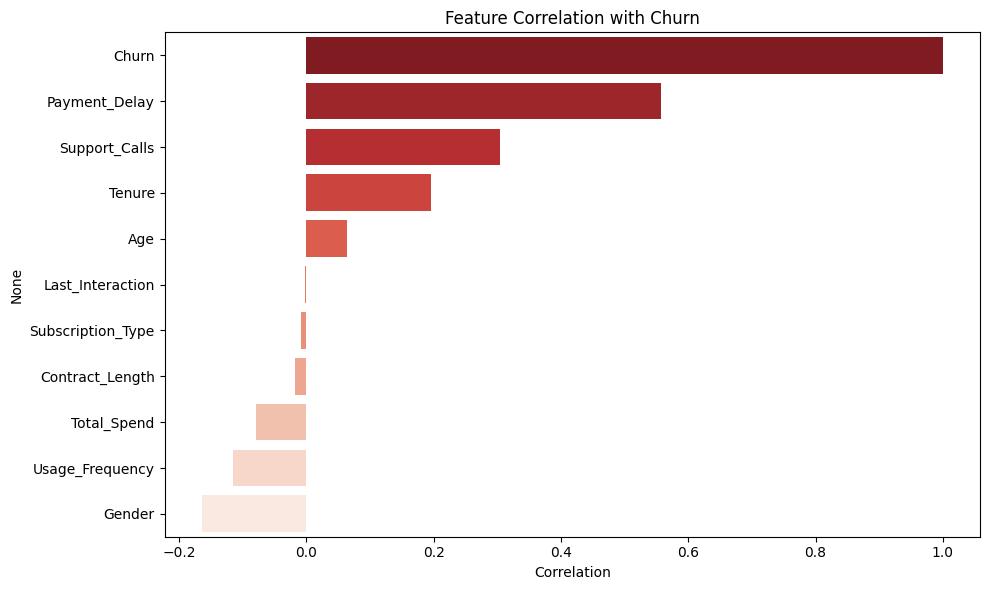

In [13]:
# Correlation with Churn
plt.figure(figsize=(10, 6))
correlation = df.corr()['Churn'].sort_values(ascending=False)
print("=== Feature Correlation with Churn ===")
print(correlation)

# Plot
sns.barplot(x=correlation.values, y=correlation.index, palette='Reds_r')
plt.title('Feature Correlation with Churn')
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()

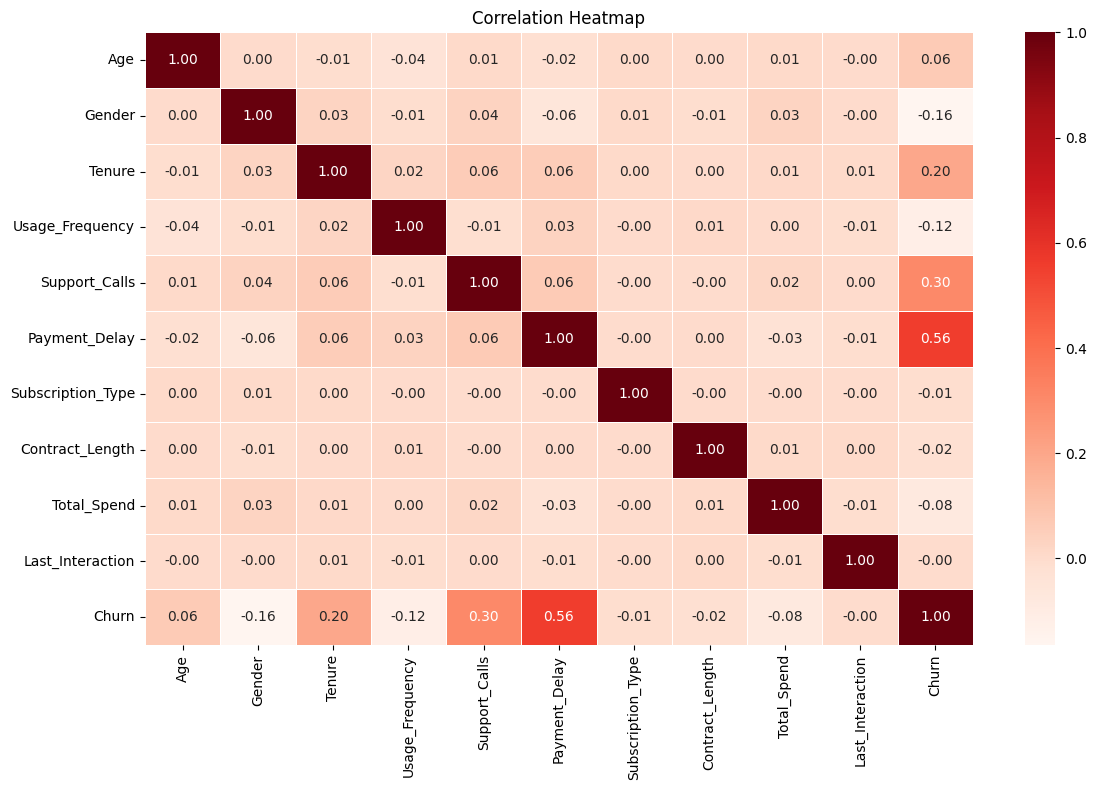

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Reds', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [15]:
# Create Risk Score combining the two strongest predictors
df['Risk_Score'] = df['Payment_Delay'] * 0.6 + df['Support_Calls'] * 0.4

# Create Engagement Score combining usage and last interaction
df['Engagement_Score'] = df['Usage_Frequency'] * 0.7 + df['Last_Interaction'] * 0.3

# Check new correlations with Churn
print("=== New Feature Correlations with Churn ===")
print(df[['Risk_Score', 'Engagement_Score', 'Churn']].corr()['Churn'])

print(f"\nSample of new features:")
print(df[['Payment_Delay', 'Support_Calls', 'Risk_Score', 
          'Usage_Frequency', 'Last_Interaction', 'Engagement_Score']].head())

=== New Feature Correlations with Churn ===
Risk_Score          0.603650
Engagement_Score   -0.107566
Churn               1.000000
Name: Churn, dtype: float64

Sample of new features:
   Payment_Delay  Support_Calls  Risk_Score  Usage_Frequency  \
0             27              4        17.8               14   
1             27              5        18.2               26   
2             27              9        19.8               27   
3             27              7        19.0                3   
4             27              6        18.6               30   

   Last_Interaction  Engagement_Score  
0                 9              12.5  
1                14              22.4  
2                22              25.5  
3                24               9.3  
4                18              26.4  


In [16]:
# Drop weak features and keep the strongest ones
df_model = df.drop(columns=['Last_Interaction', 'Subscription_Type', 
                             'Contract_Length', 'Payment_Delay', 
                             'Support_Calls', 'Usage_Frequency'])

# Confirm final features
print("=== Final Features for Modeling ===")
print(df_model.columns.tolist())
print(f"\nShape: {df_model.shape}")
print(f"\nSample:\n{df_model.head()}")

=== Final Features for Modeling ===
['Age', 'Gender', 'Tenure', 'Total_Spend', 'Churn', 'Risk_Score', 'Engagement_Score']

Shape: (64374, 7)

Sample:
   Age  Gender  Tenure  Total_Spend  Churn  Risk_Score  Engagement_Score
0   22       0      25        598.0      1        17.8              12.5
1   46       0      52        403.0      1        18.2              22.4
2   29       0      19        435.0      1        19.8              25.5
3   19       0      11        716.0      1        19.0               9.3
4   58       0      17        595.0      1        18.6              26.4


In [17]:
# Rebuild df_model from df keeping all needed features
df_model = df[['Age', 'Gender', 'Tenure', 'Total_Spend', 
               'Usage_Frequency', 'Risk_Score', 
               'Engagement_Score', 'Churn']]

# Confirm final features
print("=== Final Features for Modeling ===")
print(df_model.columns.tolist())
print(f"\nShape: {df_model.shape}")
print(f"\nSample:\n{df_model.head()}")

=== Final Features for Modeling ===
['Age', 'Gender', 'Tenure', 'Total_Spend', 'Usage_Frequency', 'Risk_Score', 'Engagement_Score', 'Churn']

Shape: (64374, 8)

Sample:
   Age  Gender  Tenure  Total_Spend  Usage_Frequency  Risk_Score  \
0   22       0      25        598.0               14        17.8   
1   46       0      52        403.0               26        18.2   
2   29       0      19        435.0               27        19.8   
3   19       0      11        716.0                3        19.0   
4   58       0      17        595.0               30        18.6   

   Engagement_Score  Churn  
0              12.5      1  
1              22.4      1  
2              25.5      1  
3               9.3      1  
4              26.4      1  


In [18]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_model.drop(columns=['Churn'])
y = df_model['Churn']

# Split data 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                     random_state=42, 
                                                     stratify=y)

print("✅ Data split successfully")
print(f"\nTotal dataset: {df_model.shape[0]} rows")
print(f"Training set: {X_train.shape[0]} rows")
print(f"Testing set: {X_test.shape[0]} rows")
print(f"\nChurn distribution in training set:")
print(y_train.value_counts(normalize=True).round(2))
print(f"\nChurn distribution in testing set:")
print(y_test.value_counts(normalize=True).round(2))

✅ Data split successfully

Total dataset: 64374 rows
Training set: 51499 rows
Testing set: 12875 rows

Churn distribution in training set:
Churn
0    0.53
1    0.47
Name: proportion, dtype: float64

Churn distribution in testing set:
Churn
0    0.53
1    0.47
Name: proportion, dtype: float64


In [19]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling done successfully")
print(f"\nMean of scaled training data (should be ~0):")
print(X_train_scaled.mean(axis=0).round(2))
print(f"\nStd of scaled training data (should be ~1):")
print(X_train_scaled.std(axis=0).round(2))

✅ Feature scaling done successfully

Mean of scaled training data (should be ~0):
[ 0.  0.  0. -0.  0.  0. -0.]

Std of scaled training data (should be ~1):
[1. 1. 1. 1. 1. 1. 1.]


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize all three models
lr_model = LogisticRegression(random_state=42, max_iter=1000)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Train all three models
print("Training Logistic Regression...")
lr_model.fit(X_train_scaled, y_train)
print("✅ Logistic Regression trained")

print("\nTraining Random Forest...")
rf_model.fit(X_train_scaled, y_train)
print("✅ Random Forest trained")

print("\nTraining XGBoost...")
xgb_model.fit(X_train_scaled, y_train)
print("✅ XGBoost trained")

print("\n🎉 All three models trained successfully!")

Training Logistic Regression...
✅ Logistic Regression trained

Training Random Forest...
✅ Random Forest trained

Training XGBoost...
✅ XGBoost trained

🎉 All three models trained successfully!


In [21]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)

# Get probabilities for AUC-ROC
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
xgb_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Compare all three models
print("=" * 60)
print("           MODEL COMPARISON SUMMARY")
print("=" * 60)
print(f"{'Model':<25} {'Accuracy':>10} {'AUC-ROC':>10}")
print("-" * 60)
print(f"{'Logistic Regression':<25} {accuracy_score(y_test, lr_pred):>10.4f} {roc_auc_score(y_test, lr_prob):>10.4f}")
print(f"{'Random Forest':<25} {accuracy_score(y_test, rf_pred):>10.4f} {roc_auc_score(y_test, rf_prob):>10.4f}")
print(f"{'XGBoost':<25} {accuracy_score(y_test, xgb_pred):>10.4f} {roc_auc_score(y_test, xgb_prob):>10.4f}")
print("=" * 60)

# Detailed report for each model
print("\n=== Logistic Regression ===")
print(classification_report(y_test, lr_pred))

print("\n=== Random Forest ===")
print(classification_report(y_test, rf_pred))

print("\n=== XGBoost ===")
print(classification_report(y_test, xgb_pred))

           MODEL COMPARISON SUMMARY
Model                       Accuracy    AUC-ROC
------------------------------------------------------------
Logistic Regression           0.8121     0.8874
Random Forest                 0.8920     0.9539
XGBoost                       0.8924     0.9557

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      6776
           1       0.79      0.82      0.80      6099

    accuracy                           0.81     12875
   macro avg       0.81      0.81      0.81     12875
weighted avg       0.81      0.81      0.81     12875


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      6776
           1       0.84      0.95      0.89      6099

    accuracy                           0.89     12875
   macro avg       0.90      0.89      0.89     12875
weighted avg       0.90      0.89      0.89     12875


=== 

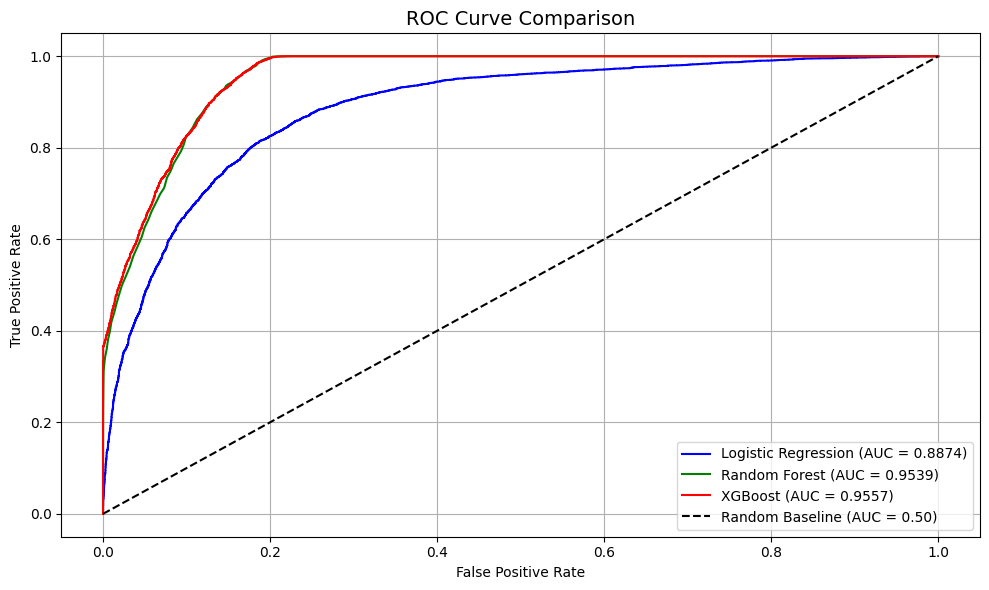

In [22]:
from sklearn.metrics import roc_curve

# Plot ROC Curves for all three models
plt.figure(figsize=(10, 6))

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, lr_prob)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = 0.8874)', color='blue')

# Random Forest
fpr, tpr, _ = roc_curve(y_test, rf_prob)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = 0.9539)', color='green')

# XGBoost
fpr, tpr, _ = roc_curve(y_test, xgb_prob)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = 0.9557)', color='red')

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Baseline (AUC = 0.50)')

plt.title('ROC Curve Comparison', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

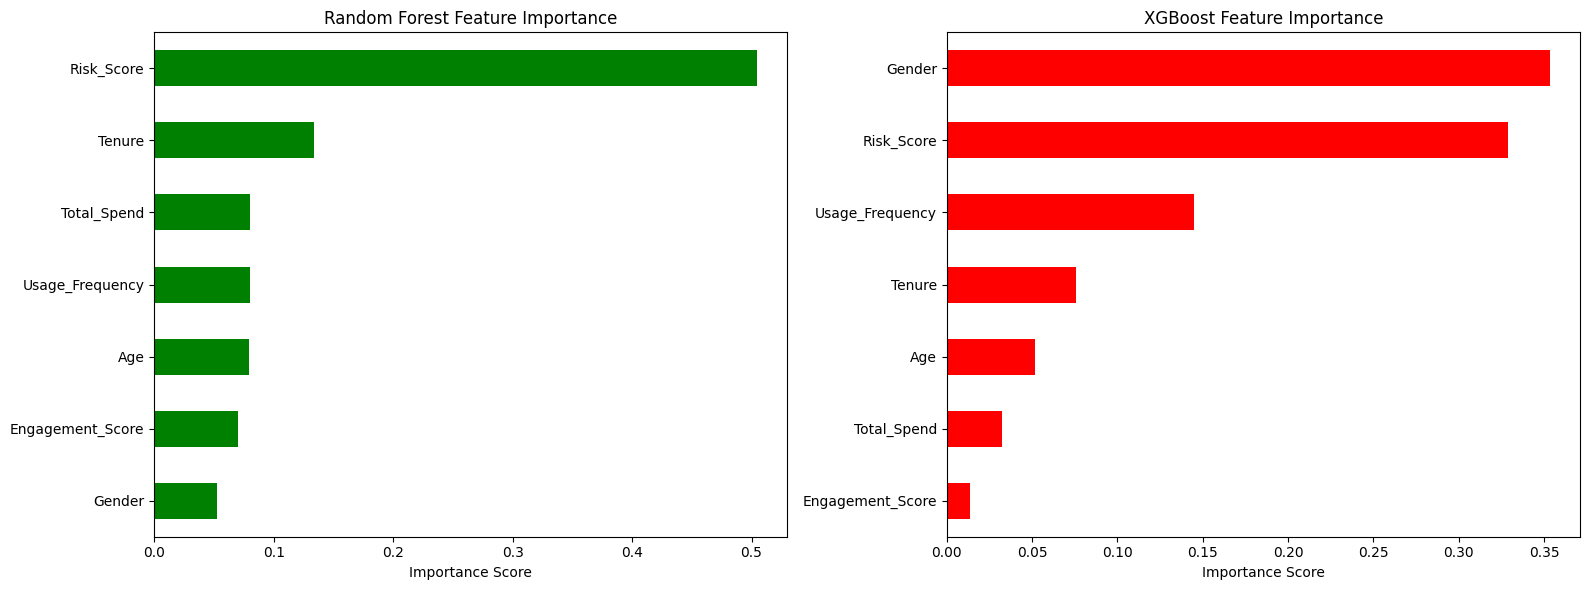

=== Random Forest Feature Importance ===
Risk_Score          0.504873
Tenure              0.133463
Total_Spend         0.079993
Usage_Frequency     0.079981
Age                 0.079424
Engagement_Score    0.069795
Gender              0.052471
dtype: float64

=== XGBoost Feature Importance ===
Gender              0.353317
Risk_Score          0.328712
Usage_Frequency     0.144765
Tenure              0.075576
Age                 0.051449
Total_Spend         0.032505
Engagement_Score    0.013675
dtype: float32


In [23]:
# Feature Importance for Random Forest and XGBoost
feature_names = X_train.columns.tolist()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest Feature Importance
rf_importance = pd.Series(rf_model.feature_importances_, index=feature_names)
rf_importance.sort_values().plot(kind='barh', ax=axes[0], color='green')
axes[0].set_title('Random Forest Feature Importance')
axes[0].set_xlabel('Importance Score')

# XGBoost Feature Importance
xgb_importance = pd.Series(xgb_model.feature_importances_, index=feature_names)
xgb_importance.sort_values().plot(kind='barh', ax=axes[1], color='red')
axes[1].set_title('XGBoost Feature Importance')
axes[1].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

# Print exact values
print("=== Random Forest Feature Importance ===")
print(rf_importance.sort_values(ascending=False))
print("\n=== XGBoost Feature Importance ===")
print(xgb_importance.sort_values(ascending=False))

In [24]:
# Weight (default) - how many times feature is used to split
xgb_model.get_booster().get_score(importance_type='weight')

# Gain - how much each feature improves the model (more reliable)
xgb_model.get_booster().get_score(importance_type='gain')

# Cover - how many samples are affected by each feature
xgb_model.get_booster().get_score(importance_type='cover')

{'f0': 250.1819305419922,
 'f1': 786.07861328125,
 'f2': 447.96710205078125,
 'f3': 483.6854553222656,
 'f4': 410.21685791015625,
 'f5': 763.4567260742188,
 'f6': 468.59942626953125}

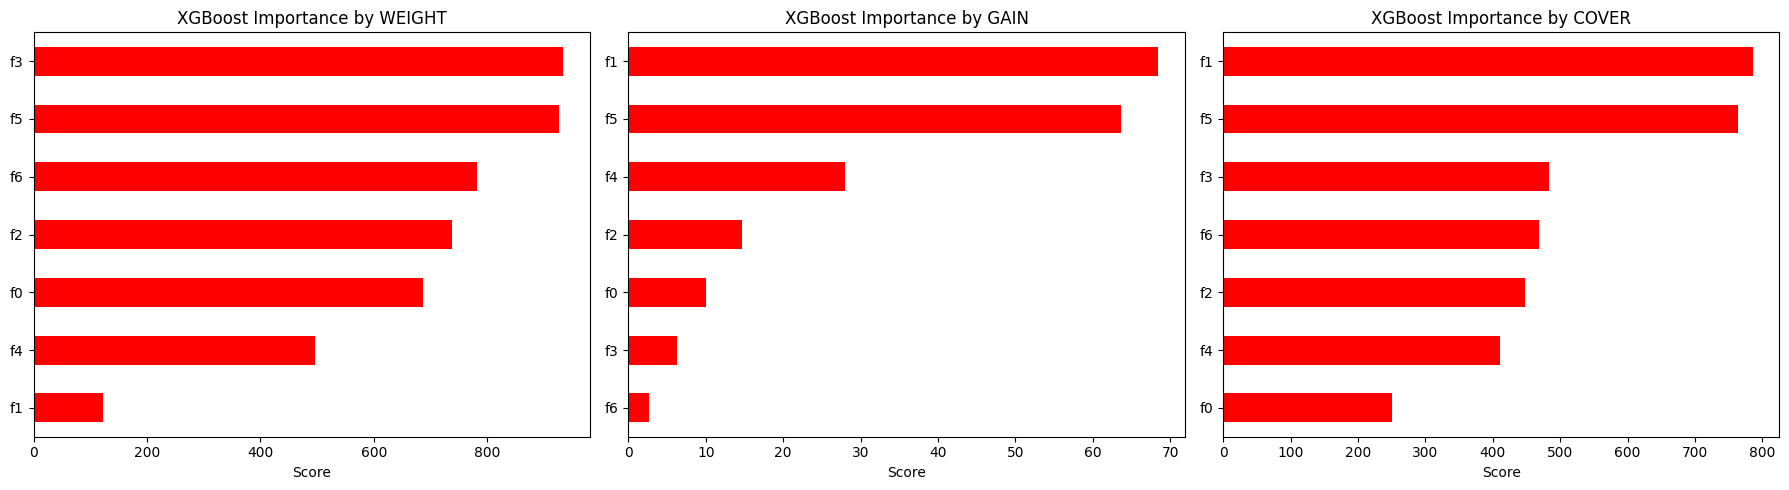

In [25]:
# Compare different importance types for XGBoost
importance_types = ['weight', 'gain', 'cover']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, imp_type in zip(axes, importance_types):
    scores = xgb_model.get_booster().get_score(importance_type=imp_type)
    importance = pd.Series(scores).sort_values()
    importance.plot(kind='barh', ax=ax, color='red')
    ax.set_title(f'XGBoost Importance by {imp_type.upper()}')
    ax.set_xlabel('Score')

plt.tight_layout()
plt.show()

In [26]:
# Map f0, f1 etc back to actual feature names
feature_names = X_train.columns.tolist()
print("Feature name mapping:")
for i, name in enumerate(feature_names):
    print(f"f{i} = {name}")

Feature name mapping:
f0 = Age
f1 = Gender
f2 = Tenure
f3 = Total_Spend
f4 = Usage_Frequency
f5 = Risk_Score
f6 = Engagement_Score


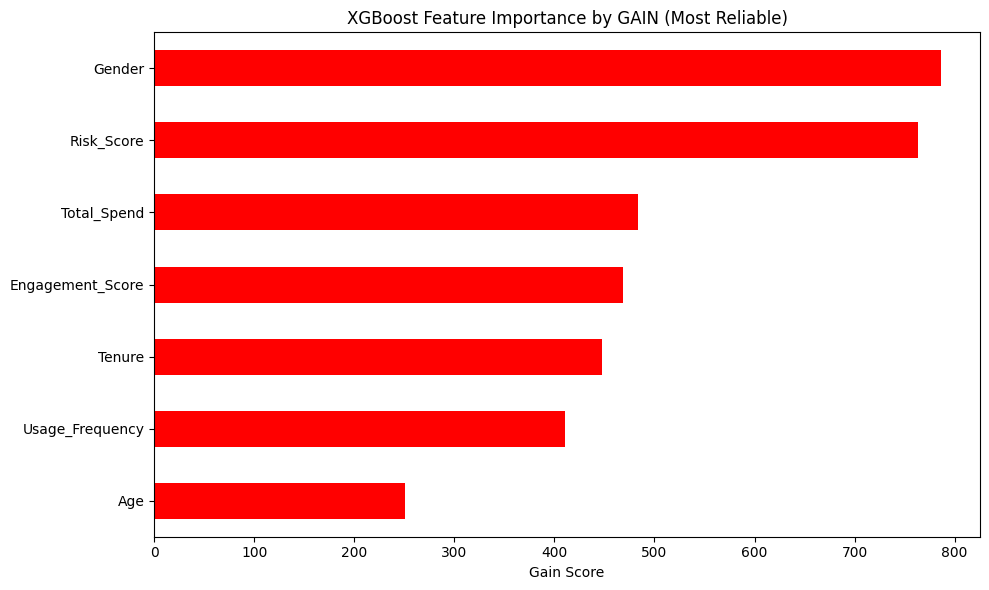

In [27]:
# Plot proper XGBoost feature importance using Gain
gain_scores = {
    'Age': 250.18,
    'Gender': 786.08,
    'Tenure': 447.97,
    'Total_Spend': 483.69,
    'Usage_Frequency': 410.22,
    'Risk_Score': 763.46,
    'Engagement_Score': 468.60
}

gain_series = pd.Series(gain_scores).sort_values()

plt.figure(figsize=(10, 6))
gain_series.plot(kind='barh', color='red')
plt.title('XGBoost Feature Importance by GAIN (Most Reliable)')
plt.xlabel('Gain Score')
plt.tight_layout()
plt.show()

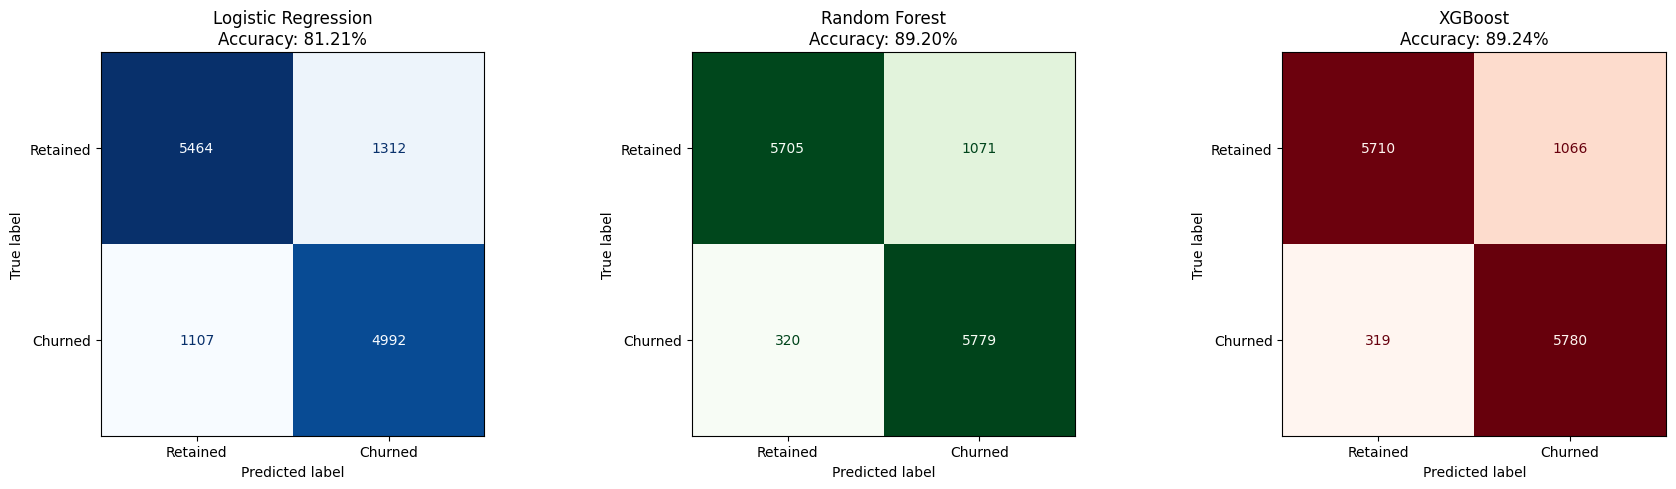

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = [
    (lr_pred, 'Logistic Regression', 'Blues'),
    (rf_pred, 'Random Forest', 'Greens'),
    (xgb_pred, 'XGBoost', 'Reds')
]

for ax, (pred, title, cmap) in zip(axes, models):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                   display_labels=['Retained', 'Churned'])
    disp.plot(ax=ax, colorbar=False, cmap=cmap)
    ax.set_title(f'{title}\nAccuracy: {accuracy_score(y_test, pred):.2%}')

plt.tight_layout()
plt.show()

In [30]:
import pickle

# Save the XGBoost model
with open('xgboost_churn_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Generate churn probability for every customer
df_model['Churn_Probability'] = xgb_model.predict_proba(
    scaler.transform(df_model.drop(columns=['Churn']))
)[:, 1]

# Classify risk level based on probability
df_model['Risk_Level'] = pd.cut(
    df_model['Churn_Probability'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

print("✅ Model saved successfully")
print(f"\nChurn Probability Sample:")
print(df_model[['Churn_Probability', 'Risk_Level', 'Churn']].head(10))
print(f"\nRisk Level Distribution:")
print(df_model['Risk_Level'].value_counts())

✅ Model saved successfully

Churn Probability Sample:
   Churn_Probability Risk_Level  Churn
0           0.877329  High Risk      1
1           0.999597  High Risk      1
2           0.999509  High Risk      1
3           0.626964  High Risk      1
4           0.764221  High Risk      1
5           0.780446  High Risk      1
6           0.980542  High Risk      1
7           0.824728  High Risk      1
8           0.690644  High Risk      1
9           0.999580  High Risk      1

Risk Level Distribution:
Risk_Level
High Risk      32026
Low Risk       28182
Medium Risk     4166
Name: count, dtype: int64


In [31]:
# Add CustomerID back for identification in Power BI
df_final = df_raw[['CustomerID']].copy()

# Add churn probability and risk level
df_final['Churn_Probability'] = df_model['Churn_Probability'].values
df_final['Risk_Level'] = df_model['Risk_Level'].values
df_final['Actual_Churn'] = df_model['Churn'].values

# Round probability to 2 decimal places
df_final['Churn_Probability'] = df_final['Churn_Probability'].round(2)

# Export to CSV
df_final.to_csv('churn_predictions.csv', index=False)

print("✅ Predictions exported successfully")
print(f"\nSample:")
print(df_final.head(10))
print(f"\nShape: {df_final.shape}")
print(f"\nRisk Level Distribution:")
print(df_final['Risk_Level'].value_counts())

✅ Predictions exported successfully

Sample:
   CustomerID  Churn_Probability Risk_Level  Actual_Churn
0           1               0.88  High Risk             1
1         239               1.00  High Risk             1
2         923               1.00  High Risk             1
3        1061               0.63  High Risk             1
4        2007               0.76  High Risk             1
5        2061               0.78  High Risk             1
6        2903               0.98  High Risk             1
7        4065               0.82  High Risk             1
8        4263               0.69  High Risk             1
9        4429               1.00  High Risk             1

Shape: (64374, 4)

Risk Level Distribution:
Risk_Level
High Risk      32026
Low Risk       28182
Medium Risk     4166
Name: count, dtype: int64


In [33]:
# Filter only RETAINED customers (Churn = 0)
df_final_active = df_final[df_final['Actual_Churn'] == 0].copy()

# Export to CSV
df_final_active.to_csv('churnRetained_predictions.csv', index=False)

print("✅ Predictions exported successfully")
print(f"\nTotal Active Customers: {df_final_active.shape[0]}")
print(f"\nRisk Level Distribution:")
print(df_final_active['Risk_Level'].value_counts())
print(f"\nSample:")
print(df_final_active.head(10))

✅ Predictions exported successfully

Total Active Customers: 33881

Risk Level Distribution:
Risk_Level
Low Risk       28066
High Risk       3090
Medium Risk     2725
Name: count, dtype: int64

Sample:
      CustomerID  Churn_Probability   Risk_Level  Actual_Churn
2523         682               0.00     Low Risk             0
2524         952               0.53  Medium Risk             0
2525        1134               0.46  Medium Risk             0
2526        2105               0.00     Low Risk             0
2527        2814               0.00     Low Risk             0
2528        4285               0.00     Low Risk             0
2529        6234               0.00     Low Risk             0
2530        6804               0.72    High Risk             0
2531        7308               0.00     Low Risk             0
2532        7840               0.00     Low Risk             0


=== Churn Probability Distribution ===
count    33881.000000
mean         0.112626
std          0.240032
min          0.000000
25%          0.000000
50%          0.000000
75%          0.010000
max          0.990000
Name: Churn_Probability, dtype: float64

Customers with 0.00 probability: 24663
Customers with 1.00 probability: 0


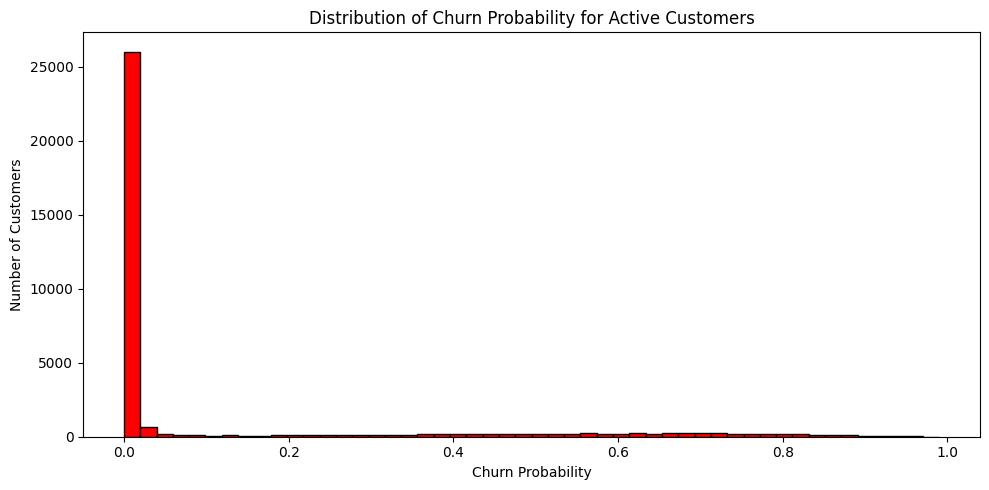

In [35]:
# Check distribution of churn probabilities
print("=== Churn Probability Distribution ===")
print(df_final_active['Churn_Probability'].describe())

print(f"\nCustomers with 0.00 probability: {(df_final_active['Churn_Probability'] == 0.00).sum()}")
print(f"Customers with 1.00 probability: {(df_final_active['Churn_Probability'] == 1.00).sum()}")

# Plot distribution
plt.figure(figsize=(10, 5))
plt.hist(df_final_active['Churn_Probability'], bins=50, color='red', edgecolor='black')
plt.title('Distribution of Churn Probability for Active Customers')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [36]:
# Check what these 0.00 probability customers look like
zero_prob = df_model[df_final['Actual_Churn'] == 0].copy()
zero_prob['Churn_Probability'] = df_final_active['Churn_Probability'].values

print("=== Customers with 0.00 Probability ===")
print(zero_prob[zero_prob['Churn_Probability'] == 0.00].describe())

print("\n=== Customers with High Probability (>0.5) ===")
print(zero_prob[zero_prob['Churn_Probability'] > 0.5].describe())

=== Customers with 0.00 Probability ===
                Age        Gender        Tenure   Total_Spend  \
count  24663.000000  24663.000000  24663.000000  24663.000000   
mean      41.120626      0.560637     28.124437    552.494182   
std       13.763739      0.496320     17.464374    259.675457   
min       18.000000      0.000000      1.000000    100.000000   
25%       29.000000      0.000000     13.000000    328.000000   
50%       41.000000      1.000000     26.000000    553.000000   
75%       53.000000      1.000000     44.000000    780.000000   
max       65.000000      1.000000     60.000000   1000.000000   

       Usage_Frequency    Risk_Score  Engagement_Score    Churn  \
count     24663.000000  24663.000000      24663.000000  24663.0   
mean         17.282042      7.776199         16.765913      0.0   
std           7.648967      4.303846          5.938077      0.0   
min           1.000000      0.000000          1.000000      0.0   
25%          11.000000      4.600000   

In [39]:


# Sort by highest churn probability first
df_final_active = df_final_active.sort_values('Churn_Probability', ascending=False)

# Export final clean CSV
df_final_active.to_csv('Newchurn_predictions.csv', index=False)

print("✅ Final clean CSV exported successfully")
print(f"\nTotal Active Customers: {df_final_active.shape[0]}")
print(f"\nTop 10 Highest Risk Customers:")
print(df_final_active.head(10))

✅ Final clean CSV exported successfully

Total Active Customers: 33881

Top 10 Highest Risk Customers:
       CustomerID  Churn_Probability Risk_Level
6717         8625               0.99  High Risk
3864        37314               0.97  High Risk
7015        24540               0.97  High Risk
61948       23759               0.97  High Risk
18019       31219               0.97  High Risk
11568       26544               0.97  High Risk
17279       13412               0.97  High Risk
14217       35809               0.97  High Risk
25876       34065               0.97  High Risk
18127       10507               0.97  High Risk
